# 5 Marker Detection 


## Further Readings
- based on the following opencv turorials 
- https://docs.opencv.org/4.0.1/d5/dae/tutorial_aruco_detection.html C++
- https://mecaruco2.readthedocs.io/en/latest/notebooks_rst/Aruco/aruco_basics.html Python
- Augmented reality - https://machinelearningknowledge.ai/augmented-reality-using-aruco-marker-detection-with-python-opencv/
Python

## Goal
 - Detec a marker 
 - estimate pose of the marker 
 - render an object according to the marker pose 

## Prerequisites 
1. marker images in ./data directory
2. camera parameter



In [1]:
pip install opencv-contrib-python 

Note: you may need to restart the kernel to use updated packages.


In [2]:
# inline plots
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# load required libraries 
import cv2 as cv
import numpy as np 
import glob
import os # file path handling

## Config

In [3]:
# select the camera to be processed
camId = 'alvium mono8'

# preconfugure some pathes 
basePath = './data/' + camId + '/'
imagePath = basePath + 'images/'
outImagePath = basePath + 'vis_images/'

## Load Camera Parameter

In [4]:
# load camera paramerter to file 
# see https://docs.opencv.org/3.4/dd/d74/tutorial_file_input_output_with_xml_yml.html for details
fnCameraParams = basePath + 'calib_' + camId + '.yml'
s = cv.FileStorage()
s.open(fnCameraParams, cv.FileStorage_READ)
cameraMatrix = s.getNode('MTX').mat()
distCoeffs = s.getNode('DIST').mat()
s.release()


## Load images 

Translationsvektor:
[[ 0.00416318 -0.06583696  0.38009228]]
Rotationsvektor:
[[-0.20951407  3.08010936  0.01222835]]
Rotationsmatrix:
[[-0.98931954 -0.13552977  0.05365195]
 [-0.13509949  0.99076432  0.01158372]
 [-0.05472638  0.00421165 -0.99849251]]
Transformationsmatrix von den Welt- in die Kamerakoordinaten:
[[-0.98931954 -0.13552977  0.05365195  0.00416318]
 [-0.13509949  0.99076432  0.01158372 -0.06583696]
 [-0.05472638  0.00421165 -0.99849251  0.38009228]
 [ 0.          0.          0.          1.        ]]


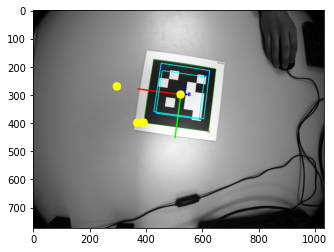

Translationsvektor:
[[ 0.01306876 -0.08749824  0.32540808]]
Rotationsvektor:
[[-0.47958142  2.79102259  0.35691656]]
Rotationsmatrix:
[[-0.90371885 -0.35728122  0.23588636]
 [-0.28642408  0.9140648   0.28713547]
 [-0.31820353  0.1919262  -0.92839154]]
Transformationsmatrix von den Welt- in die Kamerakoordinaten:
[[-0.90371885 -0.35728122  0.23588636  0.01306876]
 [-0.28642408  0.9140648   0.28713547 -0.08749824]
 [-0.31820353  0.1919262  -0.92839154  0.32540808]
 [ 0.          0.          0.          1.        ]]


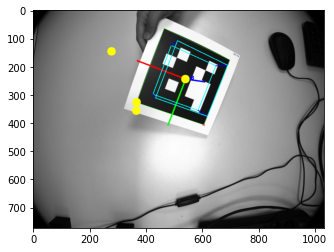

Translationsvektor:
[[-0.00713784 -0.07839795  0.37392576]]
Rotationsvektor:
[[-0.19452719  3.02633124  0.00566398]]
Rotationsmatrix:
[[-0.9858593  -0.12785026  0.10833172]
 [-0.12744386  0.99178812  0.01069538]
 [-0.10880952 -0.00326207 -0.99405727]]
Transformationsmatrix von den Welt- in die Kamerakoordinaten:
[[-0.9858593  -0.12785026  0.10833172 -0.00713784]
 [-0.12744386  0.99178812  0.01069538 -0.07839795]
 [-0.10880952 -0.00326207 -0.99405727  0.37392576]
 [ 0.          0.          0.          1.        ]]


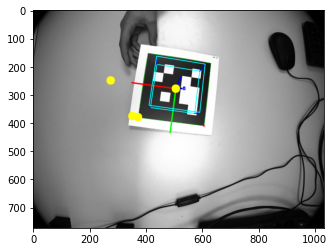

Translationsvektor:
[[ 0.09532043 -0.08229287  0.30849122]]
Rotationsvektor:
[[ 0.34043072 -2.72717221 -0.08298214]]
Rotationsmatrix:
[[-0.89465022 -0.22475902 -0.38611445]
 [-0.24781879  0.96875169  0.01029605]
 [ 0.3717349   0.10489778 -0.92239342]]
Transformationsmatrix von den Welt- in die Kamerakoordinaten:
[[-0.89465022 -0.22475902 -0.38611445  0.09532043]
 [-0.24781879  0.96875169  0.01029605 -0.08229287]
 [ 0.3717349   0.10489778 -0.92239342  0.30849122]
 [ 0.          0.          0.          1.        ]]


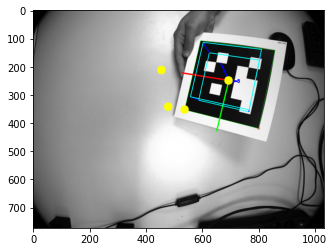

Translationsvektor:
[[ 0.00942415 -0.10592856  0.34480595]]
Rotationsvektor:
[[-0.33844109  3.0567727   0.6048834 ]]
Rotationsmatrix:
[[-0.97665602 -0.21199896 -0.03463307]
 [-0.20921191  0.90219746  0.37718711]
 [-0.04871741  0.37562771 -0.92548929]]
Transformationsmatrix von den Welt- in die Kamerakoordinaten:
[[-0.97665602 -0.21199896 -0.03463307  0.00942415]
 [-0.20921191  0.90219746  0.37718711 -0.10592856]
 [-0.04871741  0.37562771 -0.92548929  0.34480595]
 [ 0.          0.          0.          1.        ]]


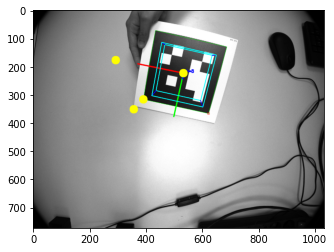

Translationsvektor:
[[ 0.02653382 -0.0497298   0.24281191]]
Rotationsvektor:
[[-0.15199854  3.05589741 -0.01120679]]
Rotationsmatrix:
[[-0.99172085 -0.09876606  0.08206713]
 [-0.09936532  0.99504574 -0.00324017]
 [-0.08134053 -0.01136797 -0.99662154]]
Transformationsmatrix von den Welt- in die Kamerakoordinaten:
[[-0.99172085 -0.09876606  0.08206713  0.02653382]
 [-0.09936532  0.99504574 -0.00324017 -0.0497298 ]
 [-0.08134053 -0.01136797 -0.99662154  0.24281191]
 [ 0.          0.          0.          1.        ]]


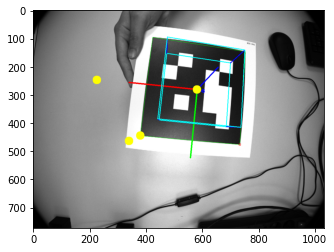

Translationsvektor:
[[ 0.01782736 -0.11432186  0.38147951]]
Rotationsvektor:
[[-0.05852193  3.09604866  0.01043756]]
Rotationsmatrix:
[[-0.99827491 -0.03792277  0.04482258]
 [-0.03761969  0.99926333  0.00758626]
 [-0.04507725  0.00588696 -0.99896616]]
Transformationsmatrix von den Welt- in die Kamerakoordinaten:
[[-0.99827491 -0.03792277  0.04482258  0.01782736]
 [-0.03761969  0.99926333  0.00758626 -0.11432186]
 [-0.04507725  0.00588696 -0.99896616  0.38147951]
 [ 0.          0.          0.          1.        ]]


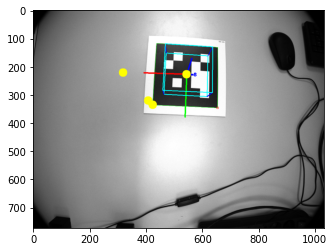

Translationsvektor:
[[ 0.00891983 -0.08806124  0.30229013]]
Rotationsvektor:
[[-0.30399701  2.96651546 -0.48991855]]
Rotationsmatrix:
[[-0.97269461 -0.17744956  0.14958896]
 [-0.21612417  0.92745857 -0.30514085]
 [-0.08459046 -0.32913865 -0.94048509]]
Transformationsmatrix von den Welt- in die Kamerakoordinaten:
[[-0.97269461 -0.17744956  0.14958896  0.00891983]
 [-0.21612417  0.92745857 -0.30514085 -0.08806124]
 [-0.08459046 -0.32913865 -0.94048509  0.30229013]
 [ 0.          0.          0.          1.        ]]


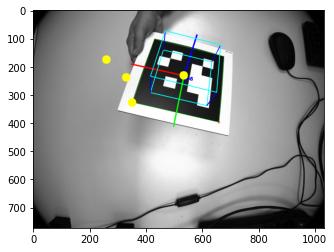

Translationsvektor:
[[-0.06158204 -0.1027347   0.31503367]]
Rotationsvektor:
[[-0.29391904  2.69795261 -0.13946352]]
Rotationsmatrix:
[[-0.88905101 -0.18412935  0.41914757]
 [-0.22636591  0.97260573 -0.05288253]
 [-0.3979281  -0.14189599 -0.90637672]]
Transformationsmatrix von den Welt- in die Kamerakoordinaten:
[[-0.88905101 -0.18412935  0.41914757 -0.06158204]
 [-0.22636591  0.97260573 -0.05288253 -0.1027347 ]
 [-0.3979281  -0.14189599 -0.90637672  0.31503367]
 [ 0.          0.          0.          1.        ]]


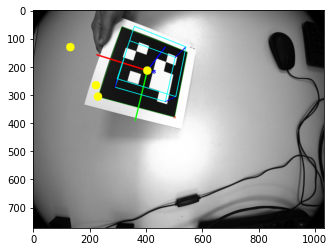

Translationsvektor:
[[ 0.02282045 -0.08890325  0.29992293]]
Rotationsvektor:
[[ 0.57533135 -2.92563401  0.36120625]]
Rotationsmatrix:
[[-0.91743797 -0.38796511 -0.08826461]
 [-0.35484766  0.89817356 -0.25955229]
 [ 0.17997417 -0.20680264 -0.96168704]]
Transformationsmatrix von den Welt- in die Kamerakoordinaten:
[[-0.91743797 -0.38796511 -0.08826461  0.02282045]
 [-0.35484766  0.89817356 -0.25955229 -0.08890325]
 [ 0.17997417 -0.20680264 -0.96168704  0.29992293]
 [ 0.          0.          0.          1.        ]]


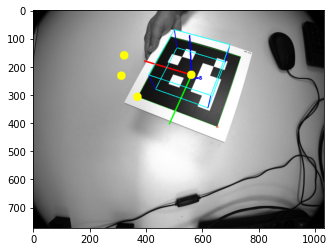

Translationsvektor:
[[-0.00997638 -0.1304398   0.3281937 ]]
Rotationsvektor:
[[-0.15721054  3.02377597 -0.13903504]]
Rotationsmatrix:
[[-0.98853255 -0.09810832  0.11479618]
 [-0.10822887  0.9904408  -0.08551923]
 [-0.10530867 -0.09696281 -0.98970112]]
Transformationsmatrix von den Welt- in die Kamerakoordinaten:
[[-0.98853255 -0.09810832  0.11479618 -0.00997638]
 [-0.10822887  0.9904408  -0.08551923 -0.1304398 ]
 [-0.10530867 -0.09696281 -0.98970112  0.3281937 ]
 [ 0.          0.          0.          1.        ]]


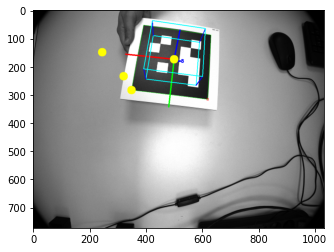

Translationsvektor:
[[ 0.02151639 -0.11963613  0.35809977]]
Rotationsvektor:
[[-0.0929994   2.83636443  0.01479641]]
Rotationsmatrix:
[[-9.52148234e-01 -6.55647947e-02  2.98521353e-01]
 [-6.24467284e-02  9.97848240e-01  1.99823991e-02]
 [-2.99189148e-01  3.84524161e-04 -9.54193746e-01]]
Transformationsmatrix von den Welt- in die Kamerakoordinaten:
[[-9.52148234e-01 -6.55647947e-02  2.98521353e-01  2.15163899e-02]
 [-6.24467284e-02  9.97848240e-01  1.99823991e-02 -1.19636126e-01]
 [-2.99189148e-01  3.84524161e-04 -9.54193746e-01  3.58099773e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


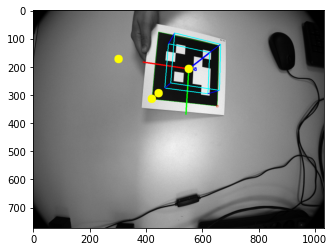

Translationsvektor:
[[ 0.00772142 -0.05965643  0.30007376]]
Rotationsvektor:
[[-0.23931299  3.01009318 -0.61626148]]
Rotationsmatrix:
[[-0.98616594 -0.13961247  0.08935942]
 [-0.16349702  0.90804965 -0.38563526]
 [-0.0273033  -0.39491036 -0.91831386]]
Transformationsmatrix von den Welt- in die Kamerakoordinaten:
[[-0.98616594 -0.13961247  0.08935942  0.00772142]
 [-0.16349702  0.90804965 -0.38563526 -0.05965643]
 [-0.0273033  -0.39491036 -0.91831386  0.30007376]
 [ 0.          0.          0.          1.        ]]


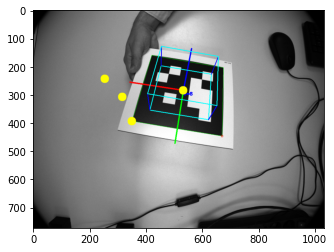

In [33]:
# image path 
imagePath = basePath + 'images/'
imageOutPath = basePath + 'vis_images/'

## Aruco
# dictionary 
arucoDict = cv.aruco.Dictionary_get(cv.aruco.DICT_5X5_50)
# length of the sides of a marker 
markerLength = 0.15 # [m]
axisLength = 0.1 # [m]
# parameter
parameters =  cv.aruco.DetectorParameters_create()

# find all image files 
imageFiles = []
imageFiles.extend( glob.glob(imagePath + '*.png') )
imageFiles.extend( glob.glob(imagePath + '*.jpg') )

# loop over all images 
for fname in imageFiles:
    # load image
    img = cv.imread(fname)
    # convert to grayscale and RGB image 
    imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    imgBGR = img

    # detect marker and render 
    corners, ids, rejectedImgPoints = cv.aruco.detectMarkers(imgGray, arucoDict, parameters=parameters)
    # TODO Aufgabe 3 - draw marker detection 
    cv.aruco.drawDetectedMarkers(img,corners,ids)
    
    
    # draw marker pose 
    # all metric dimensions are in meter 
    rvecs, tvecs, _objPoints = cv.aruco.estimatePoseSingleMarkers(corners, markerLength, cameraMatrix, distCoeffs)
    if ids is not None:
        for (idx,rvec,tvec) in zip(ids,rvecs,tvecs):
            # TODO Aufgabe 3 - draw marker pose
            cv.aruco.drawAxis(imgBGR,cameraMatrix,distCoeffs,rvec,tvec,axisLength)
        
            # TODO Aufgabe 4 - Parameter
            print("Translationsvektor:")
            print(tvec)
            print("Rotationsvektor:")
            print( rvec)
            
            dst,jacobian = cv.Rodrigues(rvec)
            print("Rotationsmatrix:")
            print(dst)
            
            temp = np.c_[dst,tvec.T]
            cXw = np.vstack([temp,[0,0,0,1]])
            print("Transformationsmatrix von den Welt- in die Kamerakoordinaten:")
            print(cXw)
        
            # point in marker space 
            x_m = np.array([[markerLength/2,markerLength/2,markerLength/2]]).T
            # TODO Aufgabe 5 - Rendering
            x_m1 = np.array([[0,0,0,1]]).T
            x_m2 = np.array([[0.075,0.075,0,1]]).T
            x_m3 = np.array([[0.15,0,0,1]]).T
            x_m4 = np.array([[0.075,0.075,0.075,1]]).T
           
            x_c1 = cXw@x_m1
            x_c2 = cXw@x_m2
            x_c3 = cXw@x_m3
            x_c4 = cXw@x_m4
            
            
            axisPoints = np.float32([[0,0,0],[0.075,0.075,0],[0.15,0,0],[0.075,0.075,0.075]])
            #axisPoints = np.vstack([x_c1.T,x_c2.T,x_c3.T,x_c4.T])
            #axisPoints = np.delete(axisPoints,3,1)
            #axisPoints = np.float32(axisPoints)
            #tvecs = np.float32([0,0,0])
            #matr = np.float32([[1,0,0],[0,1,0],[0,0,1]])
            
            imgpts, jac = cv.projectPoints(axisPoints, rvecs, tvecs, cameraMatrix, distCoeffs)
            x_1 = tuple(np.int32(imgpts[0].flatten()))
            x_2 = tuple(np.int32(imgpts[1].flatten()))
            x_3 = tuple(np.int32(imgpts[2].flatten()))
            x_4 = tuple(np.int32(imgpts[3].flatten()))
            cv.circle(imgBGR,x_1,15,(0,255,255),cv.FILLED)
            cv.circle(imgBGR,x_2,15,(0,255,255),cv.FILLED)
            cv.circle(imgBGR,x_3,15,(0,255,255),cv.FILLED)
            cv.circle(imgBGR,x_4,15,(0,255,255),cv.FILLED)

            
            # Aufgabe 6
            
            axis = np.float32([[-0.05, -0.05, 0], [-0.05, 0.05, 0], [0.05, 0.05, 0], [0.05, -0.05, 0],
                   [-0.05, -0.05, 0.05], [-0.05, 0.05, 0.05], [0.05, 0.05, 0.05],[0.05, -0.05, 0.05]])
            # Now we transform the cube to the marker position and project the resulting points into 2d
            imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, cameraMatrix, distCoeffs)
            imgpts = np.int32(imgpts).reshape(-1, 2)
            imgBGR = cv.drawContours(imgBGR, [imgpts[:4]], -1, (255, 255, 0), 2)
            for i, j in zip(range(4), range(4, 8)):
                imgBGR = cv.line(imgBGR, tuple(imgpts[i]), tuple(imgpts[j]), (255, 0, 0), 2)
                imgBGR = cv.drawContours(imgBGR, [imgpts[4:]], -1, (255, 255, 0), 2)
            
            #axis = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],
            #       [0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])
           # imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, cameraMatrix, distCoeffs)
        
            #imgpts = np.int32(imgpts).reshape(-1,2)
            #print(imgpts)
            # draw ground floor in green
            #cv.drawContours(imgBGR, [imgpts[:4]],-1,(0,255,0),-3)
            # draw pillars in blue color
            #for i,j in zip(range(4),range(4,8)):
                #cv.line(imgBGR, tuple(np.int32(imgpts[i]).flatten()), tuple(np.int32(imgpts[j]).flatten()),(255),3)
            # draw top layer in red color
            #cv.drawContours(imgBGR, [imgpts[4:]],-1,(0,0,255),3)
            #axis = np.float32([[-5, -0.5, 0], [-0.5, 0.5, 0], [0.5, 0.5, 0], [0.5, -0.5, 0],
             #                  [-5, -0.5, 1], [-0.5, 0.5, 1], [0.5, 0.5, 1],[0.5, -0.5, 1]])
            
            #imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, cameraMatrix, distCoeffs)
            #imgpts = np.int32(imgpts).reshape(-1, 2)
            """"
            imgBGR = cv.drawContours(imgBGR, [imgpts[:4]], -1, (255, 0, 0), 2)
            imgBGR = cv.drawContours(imgBGR, [imgpts[4:]], -1, (255, 0, 0), 2)
            imgBGR = cv.drawContours(imgBGR, [np.array(
                [imgpts[0], imgpts[1], imgpts[5],
                 imgpts[4]])], -1, (255, 0, 0), -2)
            imgBGR = cv.drawContours(imgBGR, [np.array(
                [imgpts[2], imgpts[3], imgpts[7],
                 imgpts[6]])], -1, (255, 0, 0), -2)
            imgBGR = cv.drawContours(imgBGR, [np.array(
                [imgpts[1], imgpts[2], imgpts[6],
                 imgpts[5]])], -1, (255, 0, 0), -2)
            imgBGR = cv.drawContours(imgBGR, [np.array(
                [imgpts[0], imgpts[3], imgpts[7],
                 imgpts[4]])], -1, (255, 0, 0), -2)"""
            
           # imgBGR = cv.drawContours(imgBGR, [imgpts[:4]], -1, (255, 0, 0), 2)
            #for i, j in zip(range(4), range(4, 8)):
             #   imgBGR = cv.line(imgBGR, tuple(imgpts[i]), tuple(imgpts[j]), (255, 0, 0), 2)
              #  imgBGR = cv.drawContours(imgBGR, [imgpts[4:]], -1, (255, 0, 0), 2)
            
            # draw ground floor in green
            #imgBGR = cv.drawContours(imgBGR, [imgpts[:4]],-1,(0,255,0),-3)
            # draw pillars in blue color
            #for i,j in zip(range(4),range(4,8)):
             #   imgBGR = cv.line(imgBGR, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
            # draw top layer in red color
            #imgBGR = cv.drawContours(imgBGR, [imgpts[4:]],-1,(0,0,255),3)
            

        
    # convert back to RGB for display
    imgRGB = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)
    # show image 
    plt.figure()
    plt.imshow(imgRGB)
    plt.show()
    
    
    # store images with marker coordinate system 
    fn_rectimg = outImagePath + os.path.basename(fname)
    cv.imwrite( fn_rectimg, imgBGR )

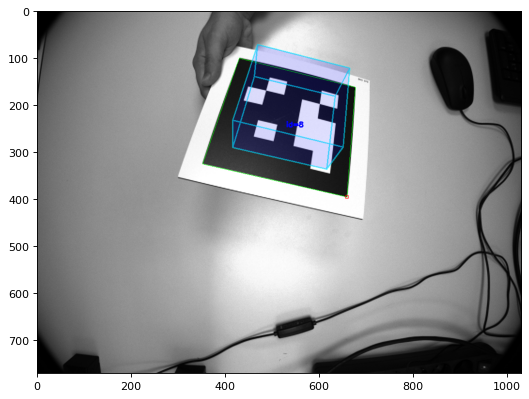

In [40]:
# image path 
imagePath = basePath + 'images/'
imageOutPath = basePath + 'vis_images/'

## Aruco
# dictionary 
arucoDict = cv.aruco.Dictionary_get(cv.aruco.DICT_5X5_50)
# length of the sides of a marker 
markerLength = 0.15 # [m]
axisLength = 0.1 # [m]
# parameter
parameters =  cv.aruco.DetectorParameters_create()

# find all image files 
imageFiles = []
imageFiles.extend( glob.glob(imagePath + '*.png') )
imageFiles.extend( glob.glob(imagePath + '*.jpg') )
fname = imageFiles[7]
    # load image
img = cv.imread(fname)
# convert to grayscale and RGB image 
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgBGR = img

# detect marker and render 
corners, ids, rejectedImgPoints = cv.aruco.detectMarkers(imgGray, arucoDict, parameters=parameters)
# TODO Aufgabe 3 - draw marker detection 
cv.aruco.drawDetectedMarkers(img,corners,ids)
    
    
# draw marker pose 
# all metric dimensions are in meter 
rvecs, tvecs, _objPoints = cv.aruco.estimatePoseSingleMarkers(corners, markerLength, cameraMatrix, distCoeffs)

axis = np.float32([[-0.05, -0.05, 0], [-0.05, 0.05, 0], [0.05, 0.05, 0], [0.05, -0.05, 0],
                   [-0.05, -0.05, 0.05], [-0.05, 0.05, 0.05], [0.05, 0.05, 0.05],[0.05, -0.05, 0.05]])

# Now comes the drawing. 
# In this example, I would like to draw the cube so that the walls also get a painted
# First create six copies of the original picture (for each side of the cube one)
side1 = imgBGR.copy()
side2 = imgBGR.copy()
side3 = imgBGR.copy()
side4 = imgBGR.copy()
side5 = imgBGR.copy()
side6 = imgBGR.copy()

# Draw the bottom side (over the marker)
side1 = cv.drawContours(side1, [imgpts[:4]], -1, (255, 0, 0), -2)
# Draw the top side (opposite of the marker)
side2 = cv.drawContours(side2, [imgpts[4:]], -1, (255, 0, 0), -2)
# Draw the right side vertical to the marker
side3 = cv.drawContours(side3, [np.array(
    [imgpts[0], imgpts[1], imgpts[5],
     imgpts[4]])], -1, (255, 0, 0), -2)
# Draw the left side vertical to the marker
side4 = cv.drawContours(side4, [np.array(
    [imgpts[2], imgpts[3], imgpts[7],
     imgpts[6]])], -1, (255, 0, 0), -2)
# Draw the front side vertical to the marker
side5 = cv.drawContours(side5, [np.array(
    [imgpts[1], imgpts[2], imgpts[6],
     imgpts[5]])], -1, (255, 0, 0), -2)
# Draw the back side vertical to the marker
side6 = cv.drawContours(side6, [np.array(
    [imgpts[0], imgpts[3], imgpts[7],
     imgpts[4]])], -1, (255, 0, 0), -2)

# Now we transform the cube to the marker position and project the resulting points into 2d
imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, cameraMatrix, distCoeffs)
imgpts = np.int32(imgpts).reshape(-1, 2)
imgBGR = cv.drawContours(imgBGR, [imgpts[:4]], -1, (255, 255, 0), 2)
for i, j in zip(range(4), range(4, 8)):
    imgBGR = cv.line(imgBGR, tuple(imgpts[i]), tuple(imgpts[j]), (255, 255, 0), 2)
    imgBGR = cv.drawContours(imgBGR, [imgpts[4:]], -1, (255, 255, 0), 2)
    
# Until here the walls of the cube are drawn in and can be merged
imgBGR = cv.addWeighted(side1, 0.1, imgBGR, 0.9, 0)
imgBGR = cv.addWeighted(side2, 0.1, imgBGR, 0.9, 0)
imgBGR = cv.addWeighted(side3, 0.1, imgBGR, 0.9, 0)
imgBGR = cv.addWeighted(side4, 0.1, imgBGR, 0.9, 0)
imgBGR = cv.addWeighted(side5, 0.1, imgBGR, 0.9, 0)
imgBGR = cv.addWeighted(side6, 0.1, imgBGR, 0.9, 0)

        
# convert back to RGB for display
imgRGB = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)
# show image 
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(imgRGB)
plt.show()